# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

## 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [24]:
# Jedi Not Working
 %config Completer.use_jedi = False

In [15]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [16]:

# env = UnityEnvironment(file_name='envs/Reacher_Windows_x86_64-one-agent/Reacher.exe')
env = UnityEnvironment(file_name='envs/Reacher_Windows_x86_64-twenty-agents/Reacher.exe')

OSError: handle is closed

ERROR:root:Exception calling application: [WinError 232] The pipe is being closed
Traceback (most recent call last):
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\site-packages\unityagents\rpc_communicator.py", line 25, in Exchange
    self.child_conn.send(request)
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\multiprocessing\connection.py", line 206, in send
    self._send_bytes(_ForkingPickler.dumps(obj))
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\multiprocessing\connection.py", line 280, in _send_bytes
    ov, err = _winapi.WriteFile(self._handle, buf, overlapped=True)
BrokenPipeError: [WinError 232] The pipe is being closed


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print(f'There are {states.shape[0]} agents. Each observes a state with '
      f'length: {state_size}')
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

KeyboardInterrupt: 

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## 4.1 DDPG

### 4.1.1 Project Architecture

The Architecture of this project was extended from the model archiecture used 
in project 1. Primarily, I built an environment manager API such that the minor
differences between OpenGym AI environments and Unity Environments can be
abstracted from the Trainer and Agent models such that either environment can
be used to train an agent with minimal to no change in code.

This leads to the discussion of the three primary classes within this project.
the `EnvironmentMgr`, the `Trainer`, and the `Agent` interfaces.

1. `EnvironmentMgr` - Each `EnvironmentMgr` class contains common commands the
   `Trainer` can interface with to command the environment to `start`, `step`,
   `reset`, `get_evn`, and `close`.
   
2. `Trainer` - This class is intended to hold all of the properties for the
   experiment and manipulate both the `Agent` and the `Environment`.
   
3. `Agent` - This is the class that holds the reinforement learning agent and
   manitains a similar structure to other implementations with minor edits for
   funciton encapsulation.

#### 4.1.1.1 Agent Selection

Due to the difficulty of the problem and the ammount of implementations using
Deep Deterministic Policy Gradient (DDPG), I chose to implement a similar
version, in order to leverage and compare my code with the available 
resources - and solicit feedback for others to review my code.

Using the DDPG implementation from the Bipedal and Pendulum models as starting
points I implemented my version of the DDPG agent. I implemented the 
Ornstein-Uhlenbeck process to add noise to my model similar to the example, and
following the advice of the prompt - I implemented methods to restrict learning
for the target Actor and Critic models as well as implementing a way to 
randomly sample a subset of agents (if n>1) for learning.

#### 4.1.1.2 Neural Network Model Architecture

After reviewing several times with fellow students and discussing with mentors
within the forums. I've selected an `Actor` Model consisting of `4` fully 
connected layers with hidden layers of `256`, `128`, and `64` units wide and input
units equal to the state size and output units equal to the action size. For
the `Critic` Model, I've constructed a `4` fully connected model again with
hidden layers equal to `256`, `128`, and `64` units wide, but following the 
recommendation of Agents of this structure to inject the states as inputs into
the first layer and actions into the second. Finally, outputting a single node.

For activation functions, the `ReLU` function was used to minimize complexity and
the hyberbolic tangent function (`tanh`) was used as output for the `Actor`.

Weights were initialized using uniform distribution from 
$\mp\frac{1}{\sqrt{N_{input}}}$ for all of the nodes save for the final node where
a uniform distribution between $\mp3e-3$ was established.

### 4.1.2 Primary Import and Utility Functionality

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
# %config Completer.use_jedi = False

import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from reacher_agents.ddpg_agent import DDPGAgent
from reacher_agents.trainers import MultiAgentTrainer, SingleAgentTrainer

from reacher_agents.config import (
    ENV_TYPE,
    CLOUD,
    BUFFER_SIZE,
    BATCH_SIZE,
    N_EPISODES,
    MAX_T,
    N_WORKERS,
    MAX_WORKERS,
    LEARN_F,
    GAMMA,
    TAU,
    LR_ACTOR,
    LR_CRITIC,
    WEIGHT_DECAY,
    WINDOW_LEN,
)

In [4]:
def main():
    if CLOUD:
        !pip -q install ./python

    if ENV_TYPE.lower() == 'gym':
        import gym
        from reacher_agents.gym_environments import GymContinuousEnvMgr
    #     scenarios = {'LunarLanderContinuous-v2',
    #                  'BipedalWalker-v3',
    #                  'Pendulum-v0'}
        envh = GymContinuousEnvMgr('Pendulum-v0')
        root_name = 'gym'
        Trainer = SingleAgentTrainer
        upper_bound = 2.0
        solved = -250
    else:
        from reacher_agents.unity_environments import UnityEnvMgr
        if N_WORKERS == 1:
            file_name = 'envs/Reacher_Windows_x86_64-one-agent/Reacher.exe'
            root_name = 'multi'
        else:
            file_name = 'envs/Reacher_Windows_x86_64-twenty-agents/Reacher.exe'
            root_name = 'single'
        envh = UnityEnvMgr(file_name)
        Trainer = MultiAgentTrainer
        upper_bound = 1.0
        solved = 30.0

    if CLOUD:
        if one_agent:
            file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64'
        else:
            file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64'
        envh = UnityEnvMgr(file_name)
    env = envh.start()
    state_size = envh.state_size
    action_size = envh.action_size
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # device = torch.device("cpu")
    agent = DDPGAgent(
        state_size=state_size,
        action_size=action_size,
        buffer_size=BUFFER_SIZE,
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        tau=TAU,
        lr_actor=LR_ACTOR,
        lr_critic=LR_CRITIC,
        learn_f=LEARN_F,
        weight_decay=WEIGHT_DECAY,
        device=device,
        random_seed=42,
        upper_bound=upper_bound,
    )
    trainer = Trainer(
        agent=agent,
        env=envh,
        n_episodes=N_EPISODES,
        max_t=MAX_T,
        window_len=WINDOW_LEN,
        solved=solved,
        n_workers=N_WORKERS,
        max_workers=MAX_WORKERS,  # note can be lower than n
        save_root=root_name,
    )
    return envh, agent, trainer

### 4.1.3 Functionality and Adhoc Testing

This Section is intented to test the functionality of the project and verify 
the agent is learning before moving to Hyperparameter Grid Search and Run for
Record

In [ ]:
envh, agent, trainer = main()

In [4]:
scores = trainer.train()

Episode 37	Average Score: 0.65Must Reset Kernel - due to bug in UnityAgents


KeyboardInterrupt: 

### 4.1.4 Grid Search

This section investigates learning rates of the `Actor` and `Critic` models as
well as learning frequencies.

#### 4.1.4.1 Learning Rate Investigation

In [6]:
actor_lr = (1e-4, 1e-3, 2e-3)
critic_lr = (1e-4, 1e-3, 2e-3)
lr_combo = [(alr, clr) for alr in actor_lr for clr in critic_lr]
info = []


In [7]:
lr_combo

[(0.0001, 0.0001),
 (0.0001, 0.001),
 (0.0001, 0.002),
 (0.001, 0.0001),
 (0.001, 0.001),
 (0.001, 0.002),
 (0.002, 0.0001),
 (0.002, 0.001),
 (0.002, 0.002)]

In [10]:
for alr, clr in lr_combo:
    agent = DDPGAgent(
        state_size=state_size,
        action_size=action_size,
        buffer_size=BUFFER_SIZE,
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        tau=TAU,
        lr_actor=alr,
        lr_critic=clr,
        learn_f=LEARN_F,
        weight_decay=WEIGHT_DECAY,
        device=device,
        random_seed=42,
        upper_bound=upper_bound,
    )
    trainer = Trainer(
        agent=agent,
        env=envh,
        n_episodes=50,
        max_t=MAX_T,
        window_len=WINDOW_LEN,
        solved=solved,
        n_workers=N_WORKERS,
        max_workers=MAX_WORKERS,  # note can be lower than n
        save_root=root_name,
    )
    print(f'Actor LR: {alr:.1e}\tCritic LR: {clr:.1e}\n')
    scores = trainer.train()
    info.append((alr, clr, scores))

Actor LR: 1.0e-04	Critic LR: 1.0e-04
Episode 50	Average Score: 0.87Actor LR: 1.0e-04	Critic LR: 1.0e-03
Episode 50	Average Score: 0.47Actor LR: 1.0e-04	Critic LR: 2.0e-03
Episode 50	Average Score: 0.36Actor LR: 1.0e-03	Critic LR: 1.0e-04
Episode 50	Average Score: 0.86Actor LR: 1.0e-03	Critic LR: 1.0e-03
Episode 50	Average Score: 0.86Actor LR: 1.0e-03	Critic LR: 2.0e-03
Episode 50	Average Score: 0.04Actor LR: 2.0e-03	Critic LR: 1.0e-04
Episode 50	Average Score: 0.85Actor LR: 2.0e-03	Critic LR: 1.0e-03
Episode 50	Average Score: 0.04Actor LR: 2.0e-03	Critic LR: 2.0e-03
Episode 50	Average Score: 0.65

#### 4.1.4.2 Learning Frequency Investigation

In [11]:
alr =  2e-3
clr = 1e-4
learn_fs = (1, 5, 10, 15, 20)


In [12]:
for f in learn_fs:
    agent = DDPGAgent(
        state_size=state_size,
        action_size=action_size,
        buffer_size=BUFFER_SIZE,
        batch_size=BATCH_SIZE,
        gamma=GAMMA,
        tau=TAU,
        lr_actor=alr,
        lr_critic=clr,
        learn_f=f,
        weight_decay=WEIGHT_DECAY,
        device=device,
        random_seed=42,
        upper_bound=upper_bound,
    )
    trainer = Trainer(
        agent=agent,
        env=envh,
        n_episodes=50,
        max_t=MAX_T,
        window_len=WINDOW_LEN,
        solved=solved,
        n_workers=N_WORKERS,
        max_workers=MAX_WORKERS,  # note can be lower than n
        save_root=root_name,
    )
    print(f'Actor LR: {alr:.1e}\tCritic LR: {clr:.1e}\n')
    scores = trainer.train()
    info.append((alr, clr, scores))

Actor LR: 2.0e-03	Critic LR: 1.0e-04

Episode 50	Average Score: 0.86Actor LR: 2.0e-03	Critic LR: 1.0e-04

Episode 50	Average Score: 0.77Actor LR: 2.0e-03	Critic LR: 1.0e-04

Episode 50	Average Score: 0.44Actor LR: 2.0e-03	Critic LR: 1.0e-04

Episode 50	Average Score: 0.66Actor LR: 2.0e-03	Critic LR: 1.0e-04

Episode 50	Average Score: 0.66

#### 4.1.4.3 Grid Search Results

Conducting a grid search with learning rate for actor and critic I the 
following relations running 50 episode epochs:
```
Actor LR: 1.0e-04	Critic LR: 1.0e-04
Episode 50	Average Score: 0.87

Actor LR: 1.0e-04	Critic LR: 1.0e-03
Episode 50	Average Score: 0.47

Actor LR: 1.0e-04	Critic LR: 2.0e-03
Episode 50	Average Score: 0.36

Actor LR: 1.0e-03	Critic LR: 1.0e-04
Episode 50	Average Score: 0.86

Actor LR: 1.0e-03	Critic LR: 1.0e-03
Episode 50	Average Score: 0.86

Actor LR: 1.0e-03	Critic LR: 2.0e-03
Episode 50	Average Score: 0.04

Actor LR: 2.0e-03	Critic LR: 1.0e-04
Episode 50	Average Score: 0.85

Actor LR: 2.0e-03	Critic LR: 1.0e-03
Episode 50	Average Score: 0.04

Actor LR: 2.0e-03	Critic LR: 2.0e-03
Episode 50	Average Score: 0.65
```

The fastest learning rates seem to be 1e-3 and 1e-4 for the actor and from 
1e-4 to 2e-3 for the critic. With LRs close to one another I found the best
performance.
I will select the learning rates `2e-3` and `1e-4` for the actor and critic
repsectively.

When investigating learning period for soft updating the following was 
observed:
```
Actor LR: 2.0e-03	Critic LR: 1.0e-04	L_Period: 1
Episode 50	Average Score: 0.86

Actor LR: 2.0e-03	Critic LR: 1.0e-04	L_Period: 5
Episode 50	Average Score: 0.77

Actor LR: 2.0e-03	Critic LR: 1.0e-04	L_Period: 10
Episode 50	Average Score: 0.44

Actor LR: 2.0e-03	Critic LR: 1.0e-04	L_Period: 15
Episode 50	Average Score: 0.66

Actor LR: 2.0e-03	Critic LR: 1.0e-04	L_Period: 20
Episode 50	Average Score: 0.66
```

The fastest learning rate was inversely proportional to the period. Keeping
in mind that I likly will need to maintain a period of `20` time steps taking
into account previous advice from Udacity

### 4.1.5 Run for Record

Reviewing implementations from other students as well reviewing comments from
the Mentor Advice board - I've constructed the following Hyper Parameters for
the run for record:
```python
ENV_TYPE = 'unity'      # enum ('unity', 'gym') = choose which environment to run
CLOUD = False           # True if running in Udacity venv
BUFFER_SIZE = int(1e6)  # Replay buffer size
BATCH_SIZE = 128        # minibatch size
N_EPISODES = 1000       # 300|3000 max number of episodes to run
MAX_T = 1000            # Max time steps within an episode
N_WORKERS = 1           # number of workers to run in environment
MAX_WORKERS = 10        # number of workers to learn from an episode, ignored if N_WORKERS < MAX_WORKERS
LEARN_F = 20            # Learning Frequency within epiodes
GAMMA = 0.99            # discount factor
TAU = 1e-3              # soft update target parameter
LR_ACTOR = 2e-3         # learning rate for the actor
LR_CRITIC = 1e-4        # learning rate for the critic
WEIGHT_DECAY = 0.0001   # L2 weight decay parameter
WINDOW_LEN = 100        # window length for averaging
```

In [5]:
envh, agent, trainer = main()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [7]:
torch.cuda.is_available()

True

In [8]:
trainer.agent.device

device(type='cuda', index=0)

In [14]:
# trainer.agent.load('checkpoints/single-checkpoint_actor-4.8.pth', 'checkpoints/single-checkpoint_critic-4.8.pth')

In [9]:
trainer.agent.load(
    'checkpoints/single-agent-checkpoint_actor-6.8.pth',
    'checkpoints/single-agent-checkpoint_critic-6.8.pth'
)

In [10]:
scores = trainer.train()

Episode 10	Average Score: 13.70
Episode 20	Average Score: 15.86
Episode 30	Average Score: 18.44
Episode 40	Average Score: 20.37
Episode 50	Average Score: 21.03
Episode 60	Average Score: 21.69
Episode 70	Average Score: 22.53
Episode 80	Average Score: 23.20
Episode 90	Average Score: 23.59
Episode 100	Average Score: 24.05
Episode 110	Average Score: 25.34
Episode 120	Average Score: 26.11
Episode 130	Average Score: 26.51
Episode 140	Average Score: 26.65
Episode 150	Average Score: 26.88
Episode 160	Average Score: 27.04
Episode 170	Average Score: 26.88
Episode 180	Average Score: 26.71
Episode 190	Average Score: 26.62
Episode 200	Average Score: 26.41
Episode 210	Average Score: 26.29
Episode 220	Average Score: 26.41
Episode 230	Average Score: 26.33
Episode 240	Average Score: 26.34
Episode 250	Average Score: 26.41
Episode 260	Average Score: 26.41
Episode 270	Average Score: 26.48
Episode 280	Average Score: 26.60
Episode 290	Average Score: 26.69
Episode 300	Average Score: 26.81
Episode 310	Average

KeyboardInterrupt: 

Halted early since to evaluate if the model is deteriorating.

### 4.1.6 Visualize

Visualize the scores of your trained agent. 

* The `i_map` parameter to rotate through the seaborn color palette (paired in 
  groups of 2)
  * 0: blue
  * 1: green
  * 2: red
  * 3: orange
  * 4: purple


In [11]:
scores = trainer.read_scores('checkpoints/scores to checkpoint-6.8.pkl')
# scores = trainer.read_scores('checkpoints/single-scores-checkpoint-270run.pkl')
scores.extend(trainer.scores_)
# trainer.scores_ = scores68
# trainer.n_workers = 20

In [23]:
trainer.scores_ = scores

In [25]:
trainer.save_scores('checkpoint-overtrained-fc4-25.4.pkl')

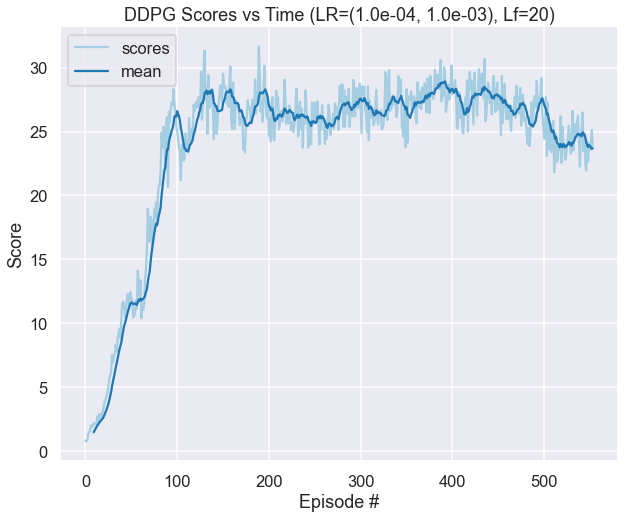

In [17]:
def plot_scores(scores, i_map=0, n_workers=N_WORKERS):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    sns.set_palette('Paired')
    cmap = sns.color_palette('Paired')
    if N_WORKERS > 1:
        scores = np.mean(np.array(scores).squeeze(), 1)
    else:
        scores = np.array(trainer.scores_).squeeze()
    alr, clr, lf = LR_ACTOR, LR_CRITIC, LEARN_F
    score_df = pd.DataFrame({'scores': scores})
    score_df = score_df.assign(mean=lambda df: df.rolling(10).mean()['scores'])

    fig ,ax = plt.subplots(1,1, figsize=(10,8))

    ax = score_df.plot(ax=ax, color=cmap[2*(i_map%4):])
    ax.set_title(f'DDPG Scores vs Time (LR=({alr:.1e}, {clr:.1e}), Lf={lf})')
    ax.set_xlabel('Episode #')
    ax.set_ylabel('Score')
    plt.show()
plot_scores(scores)

### 4.1.6 Evaluation

In [19]:
agent.load(
    r'checkpoints/single-agent-checkpoint_actor-25.4-494.pth',
    r'checkpoints/single-agent-checkpoint_critic25.4-494.pth'
)
etrainer = MultiAgentTrainer(
    agent=agent,
    env=envh,
    n_workers=N_WORKERS,
    n_episodes=100,
    max_t=1000,
    window_len=100,
    solved=30.0,
    max_workers=10,
)

In [20]:
scores = etrainer.eval(n_episodes=100, render=False)

Episode 6	Final Score: 23.18

KeyboardInterrupt: 

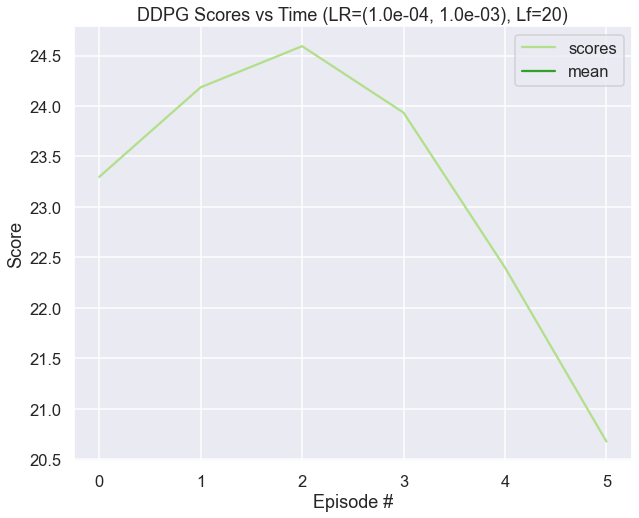

In [22]:
plot_scores(etrainer.scores_, i_map=1)

In [7]:
envh.close()

Must Reset Kernel - due to bug in UnityAgents


ERROR:root:Exception calling application: 
Traceback (most recent call last):
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\multiprocessing\connection.py", line 312, in _recv_bytes
    nread, err = ov.GetOverlappedResult(True)
BrokenPipeError: [WinError 109] The pipe has been ended

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\site-packages\grpc\_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\site-packages\unityagents\rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\multiprocessing\connection.py", line 250, in recv
    buf = self._recv_bytes()
  File "D:\ProgramData\miniconda3\envs\drlnd\lib\multiprocessing\connection.py", line 321, in _recv_bytes
    raise EOFError
EOFError


## 4.2 Results

As shown above the DDPG implementation provides consistent, albeit slow 
learning. The Model was able to solve the environment using `20` agents in 
`TBR` epsiodes. Much slower than what was demonstrated in the problem prompt.
The slow learning rate and reducing soft updating to every `20` steps 
contributed to this rate. However, increasing learning rates demonstrated 
erratic or poor performance at low episode levels (<50). Clearly, more tuning
can improve this learning rate.

## 4.3 Future Work

The training for this particular agent is very slow - further tuning of the 
hyper parameters should improve efficiency. However, applying newer 
Actor/Critic models such as Twin Delayed DDPG (TD3) would be a direct 
improvement over the applied DDPG application. Another avenue to explore would
be to investigate an on-policy method such as Asynchronous Actor Critic (A3C)
to evaluate performance directly.